### Exploring DCT(Discrete Cosine Transform)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [79]:
image = cv2.imread("../images/image-2.jpg")
image_rgb= cv2.cvtColor(image,cv2.COLOR_RGB2BGR)

(-0.5, 639.5, 426.5, -0.5)

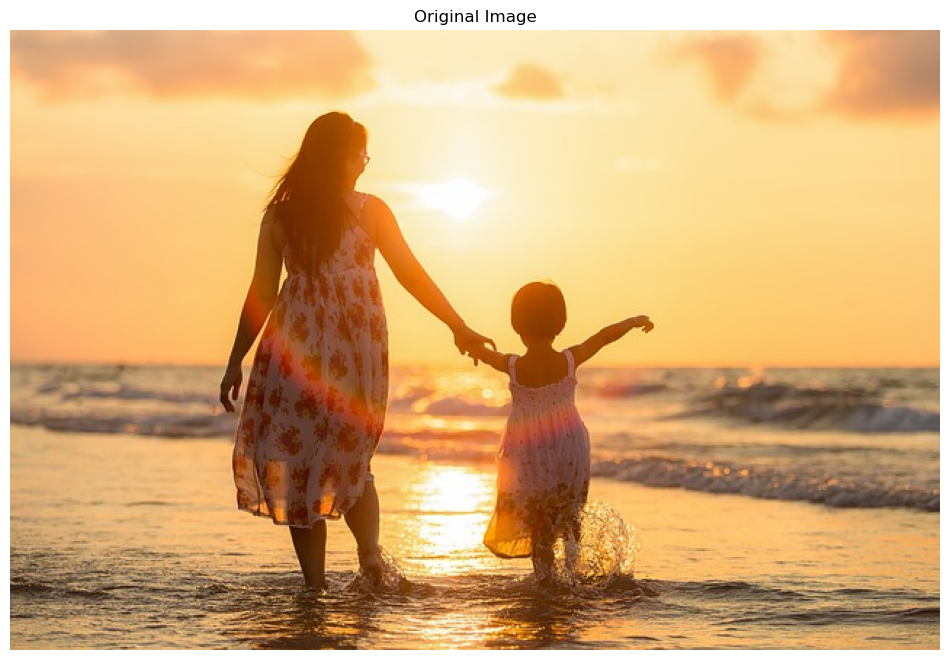

In [80]:
plt.figure(figsize=(12,9))
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis("off")

In [81]:
r_channel,g_channel,b_channel = cv2.split(image_rgb)
r_channel_float = np.float32(r_channel)/255.0
g_channel_float = np.float32(g_channel)/255.0
b_channel_float = np.float32(b_channel)/255.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 639.5, 426.5, -0.5)

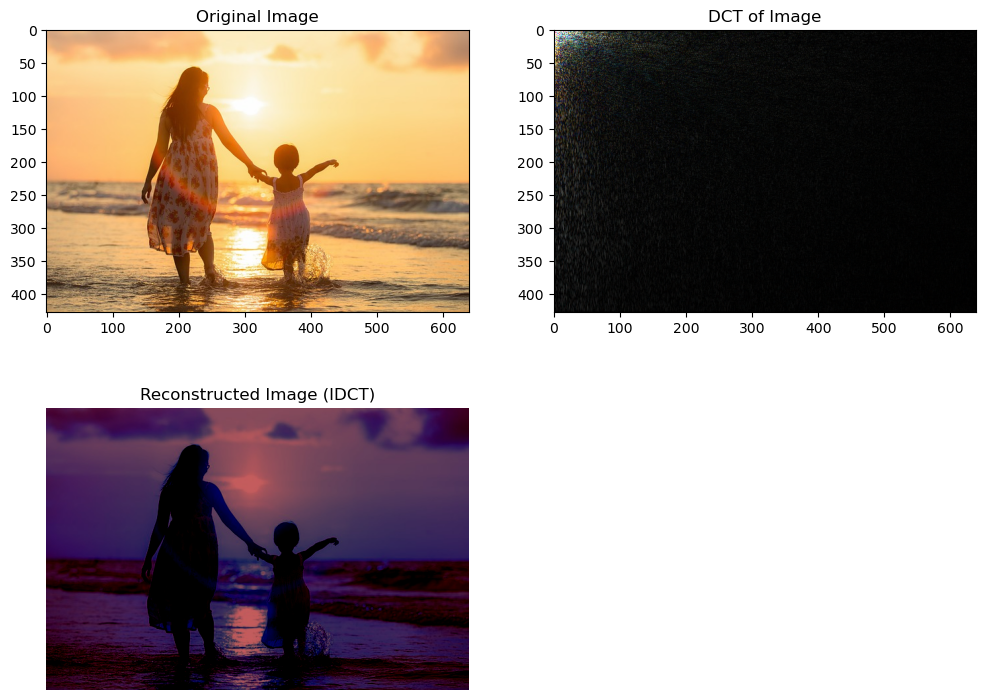

In [90]:
#APPLY DCT
dct_r = cv2.dct(r_channel_float)
dct_g = cv2.dct(g_channel_float)
dct_b = cv2.dct(b_channel_float)

#Manupulate DCT Coeffs
dct_r[0][0] = 105
dct_g[0][0] = 10
dct_b[0][0] = 106

#APPLY INVERSE DCT
idct_r = cv2.idct(dct_r)
idct_g = cv2.idct(dct_g)
idct_b = cv2.idct(dct_b)

#MERGE DCT Coeffs
dct_img = cv2.merge([dct_r,dct_g,dct_b])

# Merge the inverse DCT results to form the reconstructed image
idct_img = cv2.merge([idct_b, idct_g, idct_r]) 

# Clip the values to the range [0, 1] and convert to uint8 for display
idct_img = np.uint8(np.clip(idct_img * 255, 0, 255))

plt.figure(figsize=(12,9))
# Display Original Image
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)

# Display DCT Result (using log scale for better visualization)
dct_rgb_log = np.log1p(np.abs(dct_img)) 
plt.subplot(2, 2, 2)
plt.title("DCT of Image")
plt.imshow(dct_rgb_log)

# Display Reconstructed Image from Manipulated DCT coefficients
plt.subplot(2, 2, 3)
plt.title("Reconstructed Image (IDCT)")
plt.imshow(idct_img)
plt.axis('off')


## Understanding DCT Coefficients

When applying DCT to an image, the result is a set of coefficients that represent the image in terms of its frequency components. Here's what the coefficients signify:

### 1. First Coefficient (Top-left corner):
- The first coefficient, located at the top-left corner of the DCT matrix, is called the **DC coefficient** (Direct Current).
- This coefficient represents the average brightness (or the low-frequency component) of the image.
- The DC coefficient tells you how bright or dark the overall image is, but does not give any information about the image's fine details.

**Low Frequency**: This coefficient has the least variation and captures the overall intensity or color level in the image.

### 2. Higher Coefficients (Other parts of the DCT Matrix):
- As you move away from the DC coefficient (toward the right and downward), the frequency of the corresponding component increases.
- These coefficients correspond to higher-frequency components and capture finer details and textures in the image.

**AC Coefficients** (Alternating Current): These coefficients are called AC because they capture the variations and changes in the image, and their values oscillate (in the sense that they represent higher frequencies).

### 3. Frequency Interpretation:
- **Low-frequency coefficients** (close to the DC coefficient) describe the smooth areas of the image (large areas with uniform colors or shades).
- **High-frequency coefficients** (far from the DC coefficient) describe the fine details in the image, such as sharp edges, textures, and noise.

### 4. Coefficient Significance in Image Compression:
- The lower-frequency coefficients (closer to the DC coefficient) usually hold the most significant information about the image.
- The higher-frequency coefficients often represent fine details, which might be less important for visual perception. This makes DCT useful for image compression, as we can discard high-frequency components without significantly affecting the quality of the image.

### 5. Energy Compaction:
- DCT is highly efficient in packing most of the energy (information) of an image into the low-frequency coefficients.
- For example, in image compression algorithms like **JPEG**, most of the compression is achieved by discarding or quantizing the higher-frequency components, as they contribute less to the image's overall visual quality.

### 6. Visualizing the Coefficients:
- Low-frequency DCT coefficients generally have larger values and capture broad image features, such as the background.
- High-frequency DCT coefficients typically have smaller values, representing details like edges, textures, or noise.
- When looking at the DCT coefficients in an image, the top-left area (low frequencies) will generally contain the most significant values, while the bottom-right area (high frequencies) will contain smaller values.


# Modifying DCT Coefficients in Image Processing

Modifying the DCT coefficients of an image can have various effects depending on the coefficients you change. DCT represents the image in the frequency domain, where each coefficient corresponds to a different aspect of the image's structure.

## 1. Modifying Low-Frequency Coefficients (Near the Top-left Corner)
- **Effect on Image**: Represents overall brightness or large, smooth areas (background).
- **What Happens**:
  - **Increase**: Image becomes brighter and smoother.
  - **Decrease**: Image becomes darker or more contrasty.
- **Significance**: These coefficients dominate the overall appearance, with even small changes being noticeable.

## 2. Modifying High-Frequency Coefficients (Near the Bottom-right Corner)
- **Effect on Image**: Represents fine details like edges, textures, and noise.
- **What Happens**:
  - **Increase**: Image becomes sharper and more detailed.
  - **Decrease**: Image becomes blurry, losing details.
  - **Random Increase**: Can introduce noise or artifacts, making the image look grainy.

## 3. Zeroing Out High-Frequency Coefficients (Compression)
- **Effect on Image**: Used in image compression (like JPEG).
- **What Happens**: Fine details are removed, making the image blurry, but visually similar to the original.
- **Benefit**: Significant reduction in file size with minimal perceptual quality loss.

## 4. Scaling All Coefficients
- **Effect on Image**: Scales the contrast of the image.
- **What Happens**:
  - **Increase**: Image becomes brighter with more contrast.
  - **Decrease**: Image becomes darker with less contrast.
- **Significance**: Uniform scaling affects both low and high frequencies equally.

## 5. Quantization of Coefficients (Compression)
- **Effect on Image**: Reduces precision, especially for high-frequency coefficients.
- **What Happens**: Loss of fine details, leading to compression artifacts like blurring or blocking.
- **Result**: Reduced file size but may introduce visible artifacts.

## 6. Introducing New Coefficients
- **Effect on Image**: Adds new frequencies to the image.
- **What Happens**: Introduces distortion or artifacts, potentially creating sharp edges or unnatural patterns.

## 7. Alteration of Specific Frequencies for Image Enhancement
- **Low-Frequency Emphasis**: Enhances smooth regions (sky, background) while reducing texture.
- **High-Frequency Emphasis**: Enhances sharp edges and fine details, useful for sharpening.

## Practical Examples
- **JPEG Compression**: Quantizes and discards high-frequency coefficients, reducing file size while maintaining visual information.
- **Image Smoothing**: Zeroing high frequencies results in a smooth, less detailed image, useful for noise reduction.
- **Image Sharpening**: Increasing high-frequency coefficients sharpens edges and fine details.